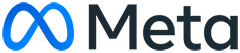

# **Getting to know Llama 3: Everything you need to start building**
Our goal in this session is to provide a guided tour of Llama 3 with comparison with Llama 2, including understanding different Llama 3 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 3 projects.

### **0 - Prerequisites**
* Basic understanding of Large Language Models
* Basic understanding of Python

In [1]:
!pip install matplotlib ipywidgets

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain)
    C-->|User Input|D[Llama 3]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 3]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama3_family():
  mm("""
  graph LR;
      llama-3 --> llama-3-8b
      llama-3 --> llama-3-70b
      llama-3-8b --> llama-3-8b
      llama-3-8b --> llama-3-8b-instruct
      llama-3-70b --> llama-3-70b
      llama-3-70b --> llama-3-70b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_3
  Llama_3 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


### **1 - Understanding Llama 3**

### **1.1 - What is Llama 3?**

* State of the art (SOTA), Open Source LLM
* 8B, 70B - base and instruct models
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Meta Llama 3 Blog](https://ai.meta.com/blog/meta-llama-3/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

In [3]:
llama2_family()

In [4]:
llama3_family()

### **1.2 - Accessing Llama 3**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Groq](https://console.groq.com/), [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 3**
* Content Generation
* Summarization
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat about Your Own Data
* Fine-tuning
* Agents

## **2 - Using and Comparing Llama 3 and Llama 2**

We will be using Llama 2 7b & 70b chat and Llama 3 8b & 70b instruct models hosted on [Replicate](https://replicate.com/search?query=llama) to run the examples here. You will need to first sign in with Replicate with your github account, then create a free API token [here](https://replicate.com/account/api-tokens) that you can use for a while. You can also use other Llama 3 cloud providers such as [Groq](https://console.groq.com/), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), or [Anyscale](https://app.endpoints.anyscale.com/playground).


### **2.1 - Install dependencies**

In [5]:
!pip install replicate

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### **2.2 - Create helpers for Llama 2 and Llama 3**
First, set your Replicate API token as environment variables.


In [7]:
import os
from getpass import getpass

REPLICATE_API_TOKEN = getpass()

os.environ["REPLICATE_API_TOKEN"] = "r8_cSHZYKfQuwA9LcypwgcLwRN1Ze4rZEG0hYCMY"

Create Llama 2 and Llama 3 helper functions - for chatbot type of apps, we'll use Llama 3 instruct and Llama 2 chat models, not the base models.

In [8]:
import replicate

def llama2_7b(prompt):
    output = replicate.run(
      "meta/llama-2-7b-chat",
      input={"prompt": prompt}
    )
    return ''.join(output)

def llama2_70b(prompt):
    output = replicate.run(
      "meta/llama-2-70b-chat",
      input={"prompt": prompt}
    )
    return ''.join(output)

def llama3_8b(prompt):
    output = replicate.run(
      "meta/meta-llama-3-8b-instruct",
      input={"prompt": prompt}
    )
    return ''.join(output)

def llama3_70b(prompt):
    output = replicate.run(
      "meta/meta-llama-3-70b-instruct",
      input={"prompt": prompt}
    )
    return ''.join(output)

### **2.3 - Basic QA with Llama 2 and 3**

In [9]:
prompt = "The typical color of a llama is: "
output = llama2_7b(prompt)
md(output)

 Great, I'm happy to help! The typical color of a llama is actually brown. Llamas are known for their distinctive coats, which are usually a shade of brown ranging from light to dark. Some llamas may also have white markings on their faces or bodies, but brown is the most common color for these animals. Is there anything else I can help with?

In [10]:
output = llama3_8b(prompt)
md(output)



The typical color of a llama is white or light-colored, with a variety of shades and patterns. They can be pure white, cream-colored, or have a light gray or beige coat with a white underbelly. Some llamas may also have a darker "saddle" or "blanket" of color on their back, which can be brown, black, or reddish-brown.

In [11]:
output = llama2_7b("The typical color of a llama is what? Answer in one word.")
md(output)

 Great, I'm happy to help! The typical color of a llama is actually gray. 🦙

In [12]:
output = llama3_8b("The typical color of a llama is what? Answer in one word.")
md(output)



Brown.

**Note: Llama 3 follows instructions better than Llama 2 in single-turn chat.**

## **3 - Chat conversation**

### **3.1 - Single-turn chat**

In [13]:
prompt_chat = "What is the average lifespan of a Llama? Answer the question in few words."
output = llama2_7b(prompt_chat)
md(output)

 The average lifespan of a llama is around 15-20 years.

In [14]:
output = llama3_8b(prompt_chat)
md(output)



15-20 years.

In [15]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama2_7b(prompt_chat)
md(output)

 I'm glad you're interested in learning more! However, I must point out that the question you've asked is not clear and does not make sense. The term "animal family" is not a specific or coherent concept in biology or taxonomy. Animals are classified into different species, genera, and families based on their evolutionary relationships and shared characteristics.

To provide a helpful answer, could you please rephrase or provide more context about the animals you are referring to? I'll do my best to provide a safe and accurate response.

In [16]:
output = llama3_8b(prompt_chat)
md(output)



Mammal.

In [17]:
output = llama2_70b(prompt_chat)
md(output)

 They belong to the family of primates.

In [18]:
output = llama3_70b(prompt_chat)
md(output)



I'm happy to help! However, I need more information. Who are "they" referring to? Please provide more context or clarify which animals you're asking about, and I'll do my best to give you a concise answer!

**Note: Llama 3 70b doesn't hallucinate.**

### **3.2 - Multi-turn chat**
Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [19]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: 15-20 years.
User: What animal family are they?
"""
output = llama2_7b(prompt_chat)
md(output)

 Assistant: Thank you for your question! Llamas are actually members of the camel family, not an animal family. They are part of the Camelidae family, which includes camels, llamas, and alpacas. On average, llamas can live for about 15-20 years. However, it's important to note that their lifespan can vary depending on several factors such as diet, health, and living conditions. Is there anything else I can help you with?

In [20]:
output = llama3_8b(prompt_chat)
md(output)



The llama belongs to the camelid family, which also includes camels, alpacas, and guanacos.

**Note: Llama 2 and 3 both behave well for using the chat history for follow up questions.**

### **3.3 - Multi-turn chat with more instruction**
Adding the instructon "Answer the question with one word" to see the difference of Llama 2 and 3.

In [21]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question with one word.
"""
output = llama2_7b(prompt_chat)
md(output)

 Sure! Llamas are part of the Camelidae family.

In [22]:
output = llama2_70b(prompt_chat)
md(output)

 Camelids

In [23]:
output = llama3_8b(prompt_chat)
md(output)



Camelid.

**Both Llama 3 8b and Llama 2 70b follows instructions (e.g. "Answer the question with one word") better than Llama 2 7b in multi-turn chat.**

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [24]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llama2_7b(prompt)
md(output)

 Interesting! 😊

In [25]:
output = llama3_8b(prompt)
md(output)



Neutral

**Note: Llama 3 has different opinions than Llama 2.**

In [26]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llama2_7b(prompt)
md(output)

 Sure, I'd be happy to help! Here are the classifications and sentiments for each of the questions you provided:

Classify: I love Llamas!
Sentiment: Positive

Classify: I dont like Snakes.
Sentiment: Negative

Classify: I saw a Gecko.
Sentiment: Neutral

In [27]:
output = llama3_8b(prompt)
md(output)



Neutral

**Note: Llama 2, with few shots, has the same output "Neutral" as Llama 3, but Llama 2 doesn't follow instructions (Give one word response) well.**

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [28]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = llama3_8b(prompt)
md(output)



Seven

In [29]:
output = llama3_70b(prompt)
md(output)



Eleven

**Note: Llama 3-8b did not get the right answer because it was asked to answer in one word.**

In [30]:
# By default, Llama 3 models follow "Chain-Of-Thought" prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?
'''

output = llama3_8b(prompt)
md(output)



Let's help Llama count its tennis balls!

Llama started with 5 tennis balls.

It buys 2 more cans of tennis balls. Each can has 3 tennis balls, so that's a total of 2 x 3 = 6 new tennis balls.

Adding the new tennis balls to the original 5, Llama now has:
5 (initial balls) + 6 (new balls) = 11 tennis balls!

So, Llama now has 11 tennis balls!

In [31]:
output = llama3_70b(prompt)
md(output)



Let's help Llama count its tennis balls!

Llama started with 5 tennis balls.

It buys 2 more cans of tennis balls, and each can has 3 tennis balls. So, Llama gets 2 x 3 = 6 new tennis balls.

To find the total number of tennis balls Llama has, we add the new tennis balls to the ones it already had: 5 (initial tennis balls) + 6 (new tennis balls) = 11

Llama now has 11 tennis balls!

**Note: By default, Llama 3 models identify word problems and solves it step by step!**

In [32]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.
Can we all get to the restaurant by car or motorcycle?
Think step by step.
Provide the answer as a single yes/no answer first.
Then explain each intermediate step.
"""
output = llama3_8b(prompt)
print(output)



Yes.

Here's the step-by-step breakdown:

1. We have 15 people and 2 cars that can seat 5 people each. This means we can fit 10 people in the cars (2 cars x 5 people per car).
2. We have 2 people left over after using the cars, which means we need to find a way to transport the remaining 2 people.
3. We have 2 motorcycles that can fit 2 people each. This means we can fit 4 people in the motorcycles (2 motorcycles x 2 people per motorcycle).
4. We still have 2 people left over after using the motorcycles, but we're out of vehicles.
5. Since we've used up all our vehicles, we can conclude that we can't fit all 15 people in cars or motorcycles.

However, we can get 14 people to the restaurant using the cars and motorcycles, leaving 1 person behind.


In [33]:
output = llama3_70b(prompt)
print(output)



**Answer:** NO

Here's the step-by-step explanation:

1. Let's start with the cars: We have 2 cars, each seating 5 people. That means we can transport a total of 2 x 5 = 10 people by car.

2. We still have 15 - 10 = 5 people left who need transportation.

3. Now, let's look at the motorcycles: We have 2 motorcycles, each fitting 2 people. That means we can transport a total of 2 x 2 = 4 people by motorcycle.

4. We still have 5 - 4 = 1 person left who needs transportation, but we don't have any more vehicles to accommodate them.

Since we can't transport all 15 people by car or motorcycle, the answer is NO.


**Note: Llama 3 70b model works correctly in this example.**

**Summary: Llama 2 often needs encouragement for step by step thinking to correctly reasoning. Llama 3 understands, reasons and explains better, making chain of thought unnecessary in the cases above.**

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





In [34]:
rag_arch()

#### **4.3.1 - LangChain**
LangChain is a framework that helps make it easier to implement RAG.

In [35]:
!pip install langchain
!pip install langchain-community
!pip install sentence-transformers
!pip install faiss-cpu
!pip install bs4
!pip install langchain-groq

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 10.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 69.5 MB/s eta 0:00:0000:0100:01
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 6.6 MB/s eta 0:00:00


#### **4.3.2 - LangChain Q&A Retriever**
* ConversationalRetrievalChain

* Query the Source documents


In [38]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# Step 1: Load the document from a web url
loader = WebBaseLoader(["https://rpsebastian.github.io"])
documents = loader.load()

# Step 2: Split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Step 3: Store the document into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

ReadTimeout: (ReadTimeoutError("HTTPSConnectionPool(host='cdn-lfs.hf-mirror.com', port=443): Read timed out. (read timeout=10)"), '(Request ID: 9e2e465d-cc41-4eca-bef6-2941cca73a50)')

You'll need to first sign in at [Groq](https://console.groq.com/login) with your github or gmail account, then get an API token to try Groq out for free.

In [ ]:
import os
from getpass import getpass

GROQ_API_TOKEN = getpass()

os.environ["GROQ_API_KEY"] = GROQ_API_TOKEN

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(temperature=0, model_name="llama3-8b-8192")

In [ ]:
from langchain.chains import ConversationalRetrievalChain

# Query against your own data
chain = ConversationalRetrievalChain.from_llm(llm,
                                              vectorstore.as_retriever(),
                                              return_source_documents=True)

# no chat history passed
result = chain({"question": "What’s new with Llama 3?", "chat_history": []})
md(result['answer'])


In [ ]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "What two sizes?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

## **5 - Fine-Tuning Models**

* Limitatons of Prompt Eng and RAG
* Fine-Tuning Arch
* Types (PEFT, LoRA, QLoRA)
* Using PyTorch for Pre-Training & Fine-Tuning

* Evals + Quality

Examples of Fine-Tuning:
* [Meta Llama Recipes](https://github.com/meta-llama/llama-recipes/tree/main/recipes/finetuning)
* [Hugging Face fine-tuning with Llama 3](https://huggingface.co/blog/llama3#fine-tuning-with-%F0%9F%A4%97-trl)


## **6 - Responsible AI**

* Power + Responsibility
* Hallucinations
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



## **7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community
* Safety and responsible use is paramount!

* Call-To-Action
  * [Replicate Free Credits](https://replicate.fyi/connect2023) for Connect attendees!
  * This notebook is available through Llama Github recipes
  * Use Llama in your projects and give us feedback


#### **Resources**
- [Meta Llama 3 Blog](https://ai.meta.com/blog/meta-llama-3/)
- [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)
- [Llama 3 repo](https://github.com/meta-llama/llama3)
- [Llama 3 model card](https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md)
- [LLama 3 Recipes repo](https://github.com/meta-llama/llama-recipes)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)

